In [161]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [163]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [164]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [165]:
#There are no null values 

In [166]:
#visualize the data

Text(0.5, 1.0, 'Hours Vs Marks')

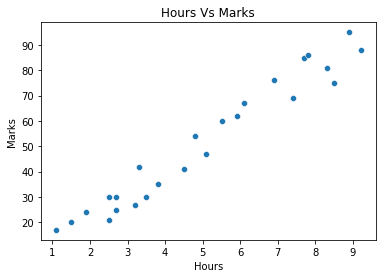

In [167]:
sns.scatterplot( x= df['Hours'],y= df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Hours Vs Marks')

In [168]:
# From the above graph it is clear that there is a linear relation between No:of hours studied and percentage of mark

In [169]:
# Inorder to predict percentage of a student based on the no:of study hours we use  simple linear regression

In [170]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [171]:
# splitting the data into test and train

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [173]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [174]:
print("intercept Value",reg.intercept_)

print("The model slope",reg.coef_)

intercept Value 2.018160041434662
The model slope [9.91065648]


In [175]:
ypredtrain=reg.predict(x_train)

In [176]:
ypredtrain

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

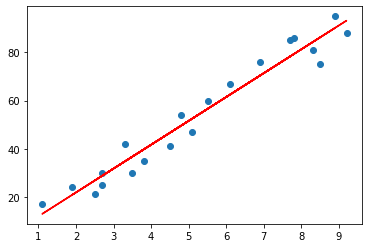

In [177]:
plt.scatter(x_train,y_train)
plt.plot(x_train,ypredtrain,color="red")
plt.show()

In [178]:
#Checking the RMS value for train data 

Checking for test data

In [179]:
ypredtest=reg.predict(x_test)

In [180]:
ypredtest

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

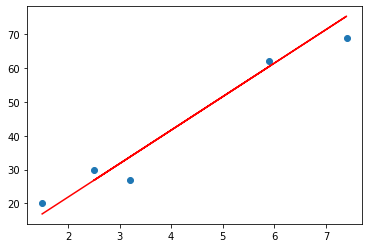

In [181]:
plt.scatter(x_test,y_test)
plt.plot(x_test,ypredtest,color='red')
plt.show()

Comparing Actual marks with predicted marks

In [182]:
data=pd.DataFrame({'Actual':y_test,'Predicted':ypredtest})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Evaluating the model

In [183]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute Error:',mean_absolute_error(y_test,ypredtest))

Mean absolute Error: 4.183859899002982


In [184]:
#Small value of Mean absolute error states thatChances of getting wrong prediction are less

Calculating predicted score if a student studies for 9.25 hours

In [185]:
hours=[9.25]
prediction=reg.predict([hours])

C:\Users\97455\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [186]:
prediction

array([93.69173249])

According to the Simple Regression Model a Student can score 93.69 percentage if he studies for 9.25 hours/day